# Load model

## import library

In [57]:
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

## import csv

In [58]:
btc_data = pd.read_csv('dataset/btc_address.csv')
eth_data = pd.read_csv('dataset/eth_address.csv')
trx_data = pd.read_csv('dataset/trx_address.csv')

## Load the model and vectorizer

In [59]:
classifier = joblib.load('model/naive_bayes_classifier.pkl')
vectorizer = joblib.load('model/vectorizer.pkl')

## concatenate data and shuffle

In [60]:
data = pd.concat([btc_data, eth_data, trx_data], ignore_index=True)
data = data.sample(frac=1).reset_index(drop=True)

## pie chart to visualize

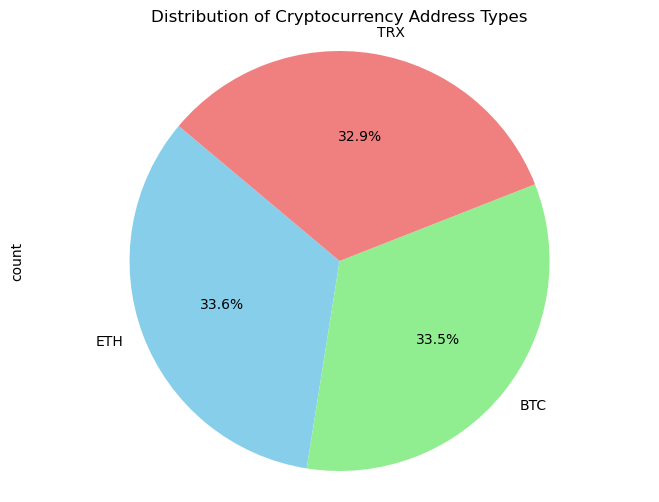

In [61]:
plt.figure(figsize=(8, 6))
data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Cryptocurrency Address Types')
plt.axis('equal')
plt.show()

## encode address types into numerical values

In [62]:
label_encoder = LabelEncoder()
data['type_encoded'] = label_encoder.fit_transform(data['type'])

## split the data into (label and features) and vectorize the address

In [63]:
X = data['address']
y = data['type']
X = vectorizer.transform(X)

## split data into train and test sets

In [64]:
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## model prediction

In [65]:
y_pred = classifier.predict(X_test)

## evaluate the model

In [66]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         BTC       1.00      0.79      0.88      8464
         ETH       0.71      1.00      0.83      8448
         TRX       1.00      0.80      0.89      8451

    accuracy                           0.87     25363
   macro avg       0.90      0.87      0.87     25363
weighted avg       0.90      0.87      0.87     25363

Accuracy: 0.8650001971375626


## confusion matrix

In [67]:
conf_mat = confusion_matrix(y_test, y_pred)
labels = label_encoder.classes_

## plot the confusion matrix

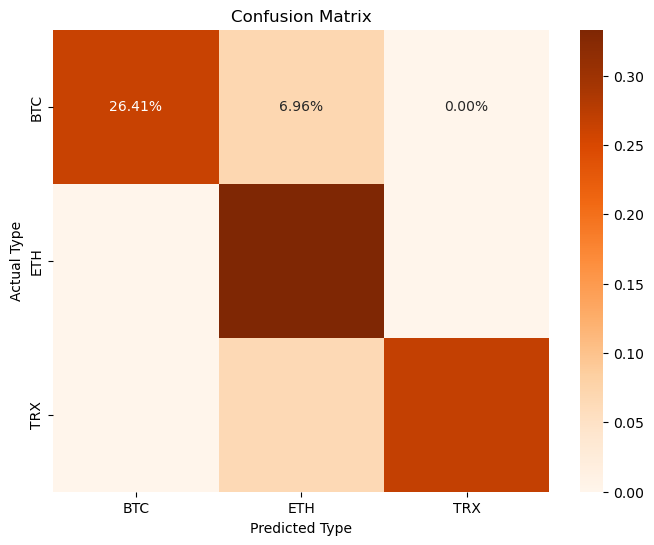

In [68]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True, fmt='.2%', cmap='Oranges', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Type')
plt.ylabel('Actual Type')
plt.title('Confusion Matrix')
plt.show()

## manual testing

In [69]:
def predict_address_type(address):
    address_vec = vectorizer.transform([address])
    prediction = classifier.predict(address_vec)
    return prediction[0]

In [70]:
test_address = input("Enter a cryptocurrency address to predict its type: ")
predicted_type = predict_address_type(test_address)
print(f"The predicted type for address {test_address} is {predicted_type}.")

The predicted type for address 1A1zP1eP5QGefi2DMPTfTL5SLmv7DivfNa is BTC.
